In [1]:
import numpy as np

from matplotlib_rc import *
from load_all_data import *

In [2]:
Rq_exp=np.array([3.477,4.2694,5.501])
BE_exp=np.array([8.667,8.710,7.867])
Fw_exp=np.array([0.1304,0.368])
Fw_sig2=np.array([0.0052**2+0.002**2,0.013**2])
Fc_exp=np.array([0.1581,0.409])

likelihood_name=['$R_{ch}, F_{ch}, BE$','+CREX+PREX','+CREX','+PREX']
likelihood_filename=['none','all','crex','prex']

def likelihood(Rq, BE, Fc, Fw):
    BE_exp=np.array([8.667,8.710,7.867])[:,np.newaxis]
    Rq_exp=np.array([3.477,4.2694,5.501])[:,np.newaxis]
    Fc_exp=np.array([0.1581,0.409])[:,np.newaxis]
    #part1=-1/(2*0.01**2)*(((Rq/Rq_exp-1)**2).sum(axis=0)+((BE/BE_exp-1)**2).sum(axis=0))
    part1=-1/(2*0.05**2)*(((Rq/Rq_exp-1)**2).sum(axis=0)+((BE/BE_exp-1)**2).sum(axis=0))
    part2=-1/(2*0.005**2)*((Fc-Fc_exp)**2).sum(axis=0)
    Fw_exp=np.array([0.1304,0.368])[:,np.newaxis]
    Fw_sig2=np.array([0.0052**2+0.002**2,0.013**2])[:,np.newaxis]
    part3=-0.5*((Fw-Fc-Fw_exp+Fc_exp)**2/Fw_sig2)[0]
    part4=-0.5*((Fw-Fc-Fw_exp+Fc_exp)**2/Fw_sig2)[1]
    return part1,part2,part3,part4

#log_likelihood_list = likelihood(PrexCrex[4:7],-PrexCrex[7:10],PrexCrex[0:2],PrexCrex[2:4])
log_likelihood_list_Skyrme = likelihood(PrexCrex_Skyrme[4:7],-PrexCrex_Skyrme[7:10],PrexCrex_Skyrme[0:2],PrexCrex_Skyrme[2:4])
log_likelihood_list_RMF = likelihood(PrexCrex_RMF[4:7],-PrexCrex_RMF[7:10],PrexCrex_RMF[0:2],PrexCrex_RMF[2:4])


Text(0.5, 0, '[log Likelihood basic]')

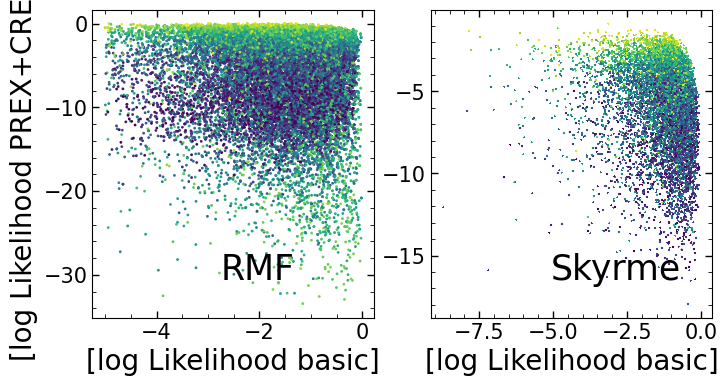

In [3]:
b4p_RMF=(eos_args_RMF[4]/763**2+eos_args_RMF[2]/980**2)/(8*939**2)*197.3**4
fig,ax=plt.subplots(1,2,figsize=(8,4),sharex=False,sharey=False)
ax[0].scatter((log_likelihood_list_RMF[0]+log_likelihood_list_RMF[1]),(log_likelihood_list_RMF[2]+log_likelihood_list_RMF[3]),s=1,label='RMF',c=b4p_RMF)
ax[1].scatter((log_likelihood_list_Skyrme[0]+log_likelihood_list_Skyrme[1]),(log_likelihood_list_Skyrme[2]+log_likelihood_list_Skyrme[3]),s=1,marker='+',label='Skyrme',c=eos_args_Skyrme[10])
ax[0].legend(frameon=False,fontsize=25)
ax[1].legend(frameon=False,fontsize=25)
ax[0].set_xlabel('[log Likelihood basic]',fontsize=20)
ax[0].set_ylabel('[log Likelihood PREX+CREX]',fontsize=20)
ax[1].set_xlabel('[log Likelihood basic]',fontsize=20)
